# Bodes phase-magnitude relation

Bode has one last curve-ball for you lovely people, he has a relation named after him that couples the phase and gain of TFs for minimum phase systems. We'll look into that more in a bit, first Bode's relation. Be warned, it's not pretty at first sight: the relation is defined in Eq. 2.10 of Skogestad as
$$ \angle G(i\Omega) = \frac{1}{\pi}\int_{-\infty}^{\infty}\underbrace{\frac{\text{d}\log|G(i\omega)|}{\text{d}\log(\omega)}}_{N(\omega)}\;\log\left|\frac{\omega+\Omega}{\omega-\Omega}\right|\frac{\text{d}\omega}{\omega} \approx 90^\circ N(\omega).$$
My issue with this is that the integral is from $-\infty$ onwards, but that $\log(x)$ is not defined for $x\leq0$, and there are many logarithms. Investigating those three factors one by one:

$\frac{\text{d}\log|G(i\omega)|}{\text{d}\log(\omega)}=N(\omega)$ is a derivative. As we've seen before, this is just the slope of the log-log graph for positive frequencies and for negative frequencies it's the same but negative. I do have some issues with the notation of the denominator though.

$\log\left|\frac{\omega+\Omega}{\omega-\Omega}\right|$ is a bit weirder, but logarithms of an absolute value, so we're good for negative values. Let's do some simplifications
$$ \log\left|\frac{\omega+\Omega}{\omega-\Omega}\right| = \log\frac{|\omega+\Omega|}{|\omega-\Omega|} = \log|\omega+\Omega| - \log|\omega-\Omega|.$$
Okay, so the function is not defined for $\omega = \pm\Omega$, because logarithms don't work for zero.

Lastly, there is $\frac{1}{\omega}$, causing problems when $\omega=0$.

Now also why in tarnation is that first approximation true? That has exactly to do with the problems described just now. Lets have a gander at the function $\frac{1}{\omega}\log\left|\frac{\omega+\Omega}{\omega-\Omega}\right|$. We plot it for some values of $\Omega$:



In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.gridspec import GridSpec
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")
from helperFunctions import *
setPlotStyle()


<IPython.core.display.Javascript object>

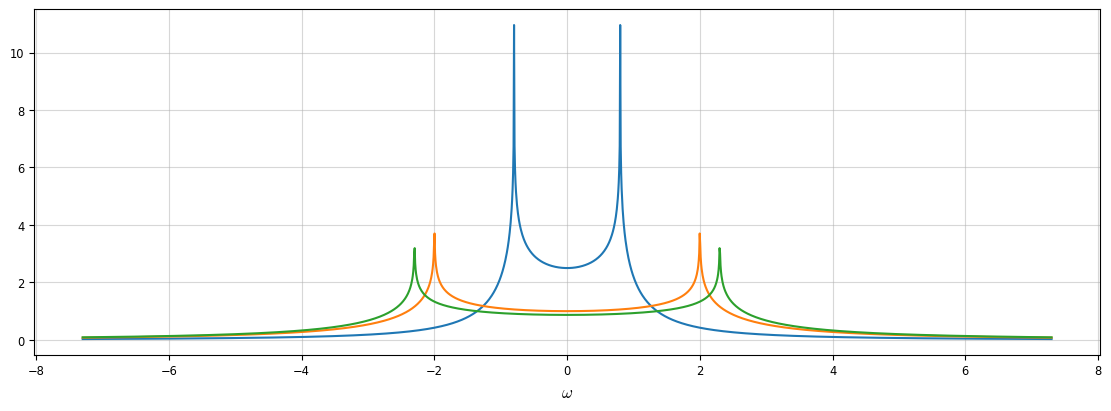

In [ ]:
W = [.8, 2., 2.3]
f = lambda w, W0 : np.log(np.abs((w + W0) / (w - W0))) / w
w = np.linspace(-max(W)-5, max(W)+5, 2000)

fig, ax = plt.subplots()
[ax.plot(w, f(w, q)) for q in W]
ax.set(xlabel=r"$\omega$")
display(fig)


Spiky plot, but what's happening at those discontinuities? So turns out that
$$\lim_{w\rightarrow\Omega} \frac{1}{\omega}\log\left|\frac{\omega+\Omega}{\omega-\Omega}\right| =  \frac{1}{\Omega}\log|2\Omega| - \lim_{w\rightarrow\Omega}\frac{1}{\Omega}\log|\omega-\Omega| =\infty,$$
since $\log(0^+)=-\infty$.

Now for
$$\lim_{w\rightarrow-\Omega} \frac{1}{\omega}\log\left|\frac{\omega+\Omega}{\omega-\Omega}\right| = \frac{1}{\Omega}\log|-2\Omega| - \frac{1}{\Omega}\lim_{w\rightarrow-\Omega} \log|\omega+\Omega| =\infty.$$
Therefore, we have peaks up to infinity at $\omega=\pm\Omega$. The limit at $\omega=0$ is annoying and I don't want to do it, because
$$ \lim_{w\rightarrow0} \frac{1}{\omega}\log\left|\frac{\omega+\Omega}{\omega-\Omega}\right| =  \frac00.$$
So we're going to do a proof by plot that $ \lim_{w\rightarrow0} \frac{1}{\omega}\log\left|\frac{\omega+\Omega}{\omega-\Omega}\right| =  \frac{2}{\Omega}$ and you're going to believe me:



<IPython.core.display.Javascript object>

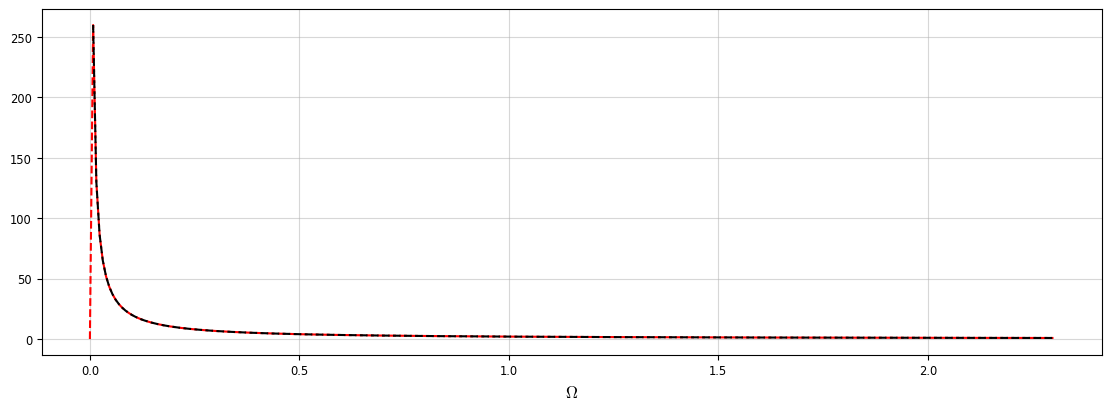

In [ ]:
W_ = np.linspace(0, W[-1], 300)

fig, ax = plt.subplots()
ax.plot(W_, [(f(-1e-12, w) + f(1e-12, w)) / 2. for w in W_], 'r--')
ax.plot(W_, 2./W_, 'k--')
ax.set(xlabel=r"$\Omega$")
display(fig)


*As you can see*, **obviously** $ \lim_{w\rightarrow0} \frac{1}{\omega}\log\left|\frac{\omega+\Omega}{\omega-\Omega}\right| =  \frac{2}{\Omega}$. Now this explanation has gotten muddy, what you need to realise about $\frac{1}{\omega}\log\left|\frac{\omega+\Omega}{\omega-\Omega}\right|$ for the next step is that it's infinte at $\pm\Omega$ and finite everywhere else.

The next step is to realise that you can approximate this with a Dirac-delta impulse that we saw in block A with the impulse response. To define that impulse, $\delta(t)$, a bit more precisely:
$$\delta(t) = \infty \text{ for } t = 0,\; \delta(t) = 0 \text{ otherwise, and } \int_{-\infty}^\infty\delta(t)=1.$$
Now you're also going to believe me that $\int_{-\infty}^\infty \frac{1}{\omega}\log\left|\frac{\omega+\Omega}{\omega-\Omega}\right|\text{d}\omega = \frac{\pi^2}{2}$. Then the approximation is
$$ \frac{1}{\omega}\log\left|\frac{\omega+\Omega}{\omega-\Omega}\right| \approx \frac{\pi^2}{2} \delta(\omega - \Omega).$$
See Sec. 3 of [Bechhoefer 2011](https://arxiv.org/abs/1107.0071) (DOI:10.1119/1.3614039) on why this is one-sided.

Finally connecting back to the phase-gain relation, we get
$$ \angle G(i\Omega) = \frac{1}{\pi}\int_{-\infty}^{\infty}N(\omega)\;\log\left|\frac{\omega+\Omega}{\omega-\Omega}\right|\frac{\text{d}\omega}{\omega} \approx \frac{1}{\pi}\int_{-\infty}^{\infty}N(\omega)\frac{\pi^2}{2}\delta(\omega - \Omega) = \frac{\pi}{2}N(\Omega) = 90^\circ N(\Omega).$$

Tadaaa🎊

Lets see how good this approximation is:

<IPython.core.display.Javascript object>

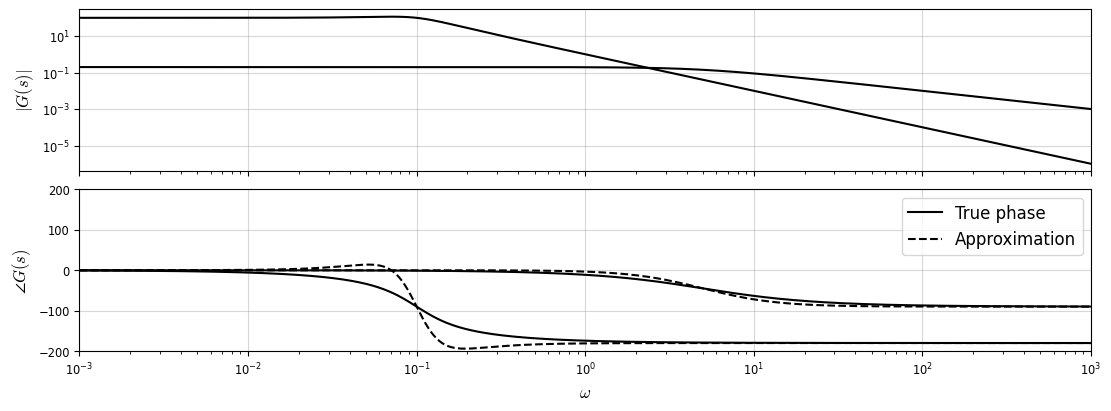

In [ ]:
OM = np.logspace(-3, 3, 700)
S = OM*1j

TFs = [1. / (S + 5),
       1. / (S**2 + 2*0.5*1e-1*S + 1e-1**2),
        # (S + 3.) / ((S + 1e-1) * (S**2 + 2*.6*1e1*S + 1e1**2)),
        ]

fig, ax = plt.subplots(2,1, sharex=True)
for tf in TFs:
        T1 = np.log(np.abs(tf))
        PH1 = np.gradient(T1, np.log(OM))
        ax[0].loglog(OM, np.abs(tf), 'k')
        l1, = ax[1].semilogx(OM, np.angle(tf, deg=True), 'k', label="True phase")
        l2, = ax[1].semilogx(OM, 90 * PH1, 'k--', label="Approximation")

ax[0].set(ylabel=r"$|G(s)|$")
ax[1].set(xlim=[OM[0], OM[-1]], ylim=[-200,200], xlabel=r"$\omega$", ylabel=r"$\angle G(s)$")
ax[1].legend(handles=[l1,l2])
display(fig)


Very mediocre around poles, to be honest.
